# UFO Sightings Data Exploration


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Import the Data:

In [2]:
ufo_df = pd.read_csv('scrubbed.csv')

C:\Users\ed2to\AppData\Local\Temp\ipykernel_28260\1993734923.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_df = pd.read_csv('scrubbed.csv')


Before the clean up:

In [23]:
original_df = pd.read_csv('scrubbed.csv')
original_df.head(2)

C:\Users\ed2to\AppData\Local\Temp\ipykernel_28260\313704087.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv('scrubbed.csv')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082


In [24]:
ufo_df.head(2)

,datetime,city,state,country,shape,duration,comments,dateposted,latitude,longitude,location,year,month
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,us-tx-san marcos,1949,10
1,1956-10-10 21:00:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,us-tx-edna,1956,10


In [4]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


## Data Cleanup

In [5]:
#drop duration (hours/min) column:
ufo_df.drop(columns='duration (hours/min)', inplace=True)

In [6]:
#drop NAs
ufo_df.dropna(inplace = True)

#change duration and latitude to a float
ufo_df['duration (seconds)']= pd.to_numeric(ufo_df['duration (seconds)'], errors='coerce')
ufo_df['latitude']= pd.to_numeric(ufo_df['latitude'], errors='coerce')

#change column name to duration
ufo_df.rename(columns={"duration (seconds)": "duration", "date posted": 'dateposted'}, inplace = True)
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66516 entries, 0 to 80331
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    66516 non-null  object 
 1   city        66516 non-null  object 
 2   state       66516 non-null  object 
 3   country     66516 non-null  object 
 4   shape       66516 non-null  object 
 5   duration    66516 non-null  float64
 6   comments    66516 non-null  object 
 7   dateposted  66516 non-null  object 
 8   latitude    66516 non-null  float64
 9   longitude   66516 non-null  float64
dtypes: float64(3), object(7)
memory usage: 5.6+ MB


In [7]:
#reset the index after dropping those NAs
ufo_df = ufo_df.reset_index(drop = True)
ufo_df.head()

,datetime,city,state,country,shape,duration,comments,dateposted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1956 21:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
2,10/10/1960 20:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
3,10/10/1961 19:00,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889
4,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333


In [8]:
#changing the format in the datetime column:
format_change = ufo_df.datetime.str.replace('24:00', '00:00') 
format_change = pd.to_datetime(format_change, format='%m/%d/%Y %H:%M')

ufo_df['datetime'] = ufo_df.datetime.str.replace('24:00', '00:00')
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'], format='%m/%d/%Y %H:%M')

#changing the dtype to a better datetime format:
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'])
ufo_df['dateposted'] = pd.to_datetime(ufo_df['dateposted'])

ufo_df.head()

,datetime,city,state,country,shape,duration,comments,dateposted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1956-10-10 21:00:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,-82.188889
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,1999-10-02,41.117500,-73.408333


In [9]:
# ufo_df.astype({"duration": int})
ufo_df['duration'] = ufo_df['duration'].astype(int)
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66516 entries, 0 to 66515
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    66516 non-null  datetime64[ns]
 1   city        66516 non-null  object        
 2   state       66516 non-null  object        
 3   country     66516 non-null  object        
 4   shape       66516 non-null  object        
 5   duration    66516 non-null  int32         
 6   comments    66516 non-null  object        
 7   dateposted  66516 non-null  datetime64[ns]
 8   latitude    66516 non-null  float64       
 9   longitude   66516 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int32(1), object(5)
memory usage: 4.8+ MB


# Questions

### Where do ufo sightings occur the most?

In [10]:
# New column "location" with country, state, and city merged together:
ufo_df["location"] = ufo_df[['country', 'state', 'city']].agg('-'.join, axis=1)

1. (Visual #1) Let's see how many sightings have occured in USA by state:

c:\Users\ed2to\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


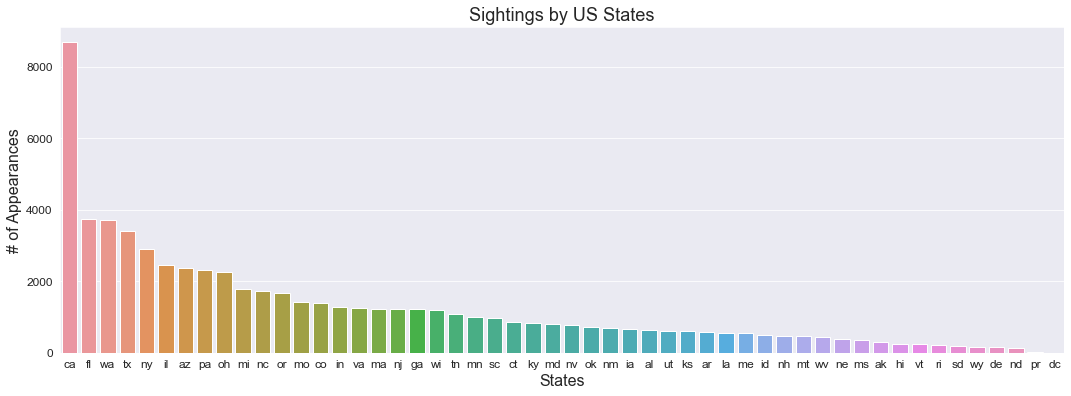

In [11]:
ufo_df['country'].value_counts()

usa_ufo = ufo_df['country']=='us'
us_data = ufo_df[usa_ufo]

#now the states:
usa_states = us_data.state.value_counts()
state_names = usa_states.index
state_freq = usa_states.sort_values(ascending = False)
state_freq
# plt.figure(figsize = (18,8))
# sns.scatterplot(x = ufo_df.state, y = state_freq)

plt.figure(figsize = (18,6))
sns.set_style("darkgrid")
sns.barplot(state_names, state_freq);

plt.title('Sightings by US States', fontsize=18)
plt.xlabel('States', fontsize=16)
plt.ylabel('# of Appearances', fontsize=16)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

2. What is the average sighting duration for disk shaped UFOs? (Convert those seconds to hours and minutes.) Where are those shapes most frequently spotted?

In [12]:
# will only show disk data:
disk_shape = ufo_df[ufo_df['shape'].str.contains('disk')]

# duration mean for disk appearances:
disk_duration = disk_shape.duration.mean()
disk_duration

1461.7823570270896

3. What day and year had the most sightings reported?

In [13]:
# make year into its own column:
ufo_df.datetime = pd.to_datetime(ufo_df.datetime)
ufo_df['year'] = ufo_df.datetime.dt.year.astype('Int64')

# ----Finding what year sightings were most reported-----
most_year = ufo_df.year.value_counts()
print(most_year.head(1))
print('2012 had the most UFO sightings reported:', most_year.iloc[0])
print()

# ----Finding what day sightings were most reported-----
most_day = ufo_df.datetime.value_counts().iloc[0]
most_day2 = ufo_df.datetime.value_counts().head(1)
print(most_day2)
print("July 4, 2010 had the most UFO sightings reported:", most_day)

2012    6489
Name: year, dtype: Int64
2012 had the most UFO sightings reported: 6489

2010-07-04 22:00:00    31
Name: datetime, dtype: int64
July 4, 2010 had the most UFO sightings reported: 31


4. When was the earliest UFO sighting reported (datetime)? Provide only the columns state, city, country, comments, and shape.

In [14]:
data = ufo_df.sort_values(by="datetime").head(1)
data[['datetime','shape', 'country', 'state', 'city', 'dateposted', 'comments']]

,datetime,shape,country,state,city,dateposted,comments
8965,1910-01-01,disk,us,mo,kirksville (near),2005-09-15,Historical sighting (1903 - 1913) Northern Mis...


5. What was the most frequent description used when people reported their experience?

In [15]:
#(comments).describe()
ufo_df.comments.describe()
print('"Fireball" was the most used description people used when describing what they saw.')
print(ufo_df.comments.describe())


"Fireball" was the most used description people used when describing what they saw.
count        66516
unique       66261
top       Fireball
freq            10
Name: comments, dtype: object


6. How many sightings were reported before (and including) 2000? How many after? What can you observe from that information?

In [16]:
#created a year and month column:
ufo_df['dateposted'] = pd.to_datetime(ufo_df['dateposted'])
ufo_df['year'], ufo_df['month'] = ufo_df['datetime'].dt.year, ufo_df['datetime'].dt.month
ufo_df

before = ufo_df[['year']][ (ufo_df['year'] >= 2000) ]

after = ufo_df[['year']][ (ufo_df['year'] < 2000) ]


print('Before and during 2000:', before.value_counts().sum())
print('After 2000:', after.value_counts().sum())
print('There were more sightings before 2000. Many of the described occurences can be explained today - better than they could have before 2000. ')

Before and during 2000: 54647
After 2000: 11869
There were more sightings before 2000. Many of the described occurences can be explained today - better than they could have before 2000. 


7. How many times do the words "alien," "abduct," "spooky," "God," "night," or "day" appear in the comments?

In [17]:
alien = ufo_df['comments'].str.contains('alien')
print('"Alien":', alien.sum())

abduct = ufo_df['comments'].str.contains('abduct')
print('"Abduct":', abduct.sum())

god = ufo_df['comments'].str.contains('God')
print('"God":', god.sum())

night = ufo_df['comments'].str.contains('night')
print('"Night":', night.sum())

day = ufo_df['comments'].str.contains('day')
print('"Day":', day.sum())

"Alien": 90
"Abduct": 71
"God": 12
"Night": 3440
"Day": 1638


8. How many sightings occured in each country?

In [18]:
ufo_df['country'].value_counts()

us    63553
ca     2942
gb       11
au       10
Name: country, dtype: int64

9. Reorder the data to show the earliest to oldest reported UFO sightings.

In [19]:
# ufo_df[['datetime','country', 'state']].transform(np.sort)
ufo_df.sort_values(by='datetime').reset_index(drop = True)

,datetime,city,state,country,shape,duration,comments,dateposted,latitude,longitude,location,year,month
0,1910-01-01 00:00:00,kirksville (near),mo,us,disk,120,Historical sighting (1903 - 1913) Northern Mis...,2005-09-15,40.194722,-92.583056,us-mo-kirksville (near),1910,1
1,1910-06-01 15:00:00,wills point,tx,us,cigar,120,Cigar shaped object moving from West to East,2005-04-16,32.709167,-96.008056,us-tx-wills point,1910,6
2,1920-06-11 21:00:00,cicero,in,us,unknown,60,((NUFORC Note: Probable hoax. Note date. PD...,2009-05-12,40.123889,-86.013333,us-in-cicero,1920,6
3,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60,Young boy witnesses disc in sky above Illinois...,2005-05-11,41.420833,-90.015000,us-il-atkinson (6 miles north of),1925,12
4,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60,we were traveling east of burns&#44clmbing up ...,2002-08-16,43.642500,-118.627500,us-or-buchanan (or burns),1929,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66511,2014-05-07 20:30:00,visalia,ca,us,fireball,180,Strange&#44 slowly moving fireball like object...,2014-05-08,36.330278,-119.291111,us-ca-visalia,2014,5
66512,2014-05-07 21:00:00,theodore,al,us,circle,120,Driving home and entered my neighborhood and s...,2014-05-08,30.547500,-88.175278,us-al-theodore,2014,5
66513,2014-05-07 21:10:00,naugatuck,ct,us,unknown,300,Large formation of lights in western sky&#44 f...,2014-05-08,41.485833,-73.051111,us-ct-naugatuck,2014,5
66514,2014-05-07 21:20:00,hillsboro,mo,us,fireball,360,Round slow moving silent ball looked like a ca...,2014-05-08,38.232222,-90.562778,us-mo-hillsboro,2014,5


10. (Visual #2) Make a graph of the frequency of shapes to see which is most recorded.

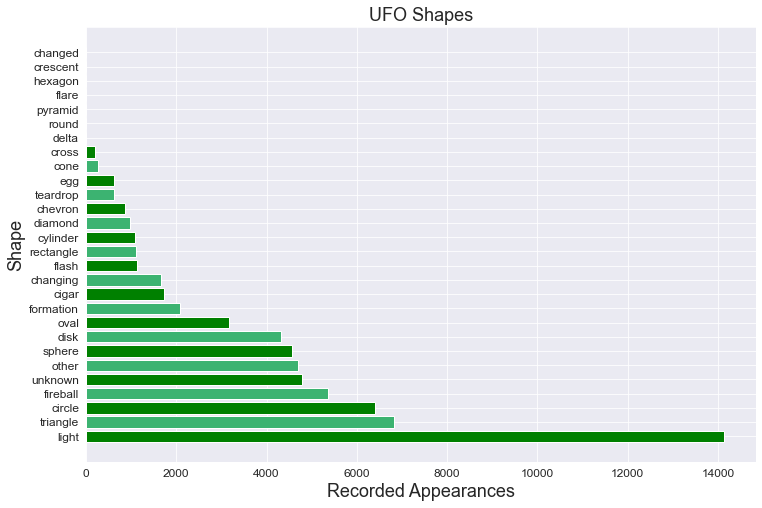

In [20]:
yeehaw = ufo_df['shape'].value_counts()

plt.figure(figsize = (12,8))
plt.barh(yeehaw.index, yeehaw, color = ['green', 'mediumseagreen']);

plt.title('UFO Shapes', fontsize=18)
plt.xlabel('Recorded Appearances', fontsize=18)
plt.ylabel('Shape', fontsize=18)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

11. (Visual #3) Plot the number of sightings in all countries on a barplot. Base it on countries and datetime in increments of 10 yrs

C:\Users\ed2to\AppData\Local\Temp\ipykernel_28260\3284352356.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv('scrubbed.csv')


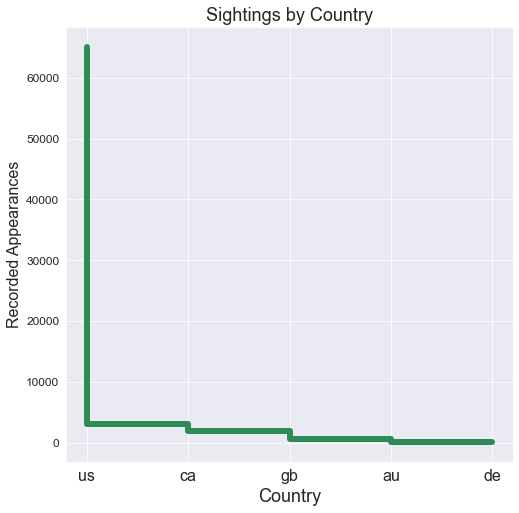

In [21]:
original_df = pd.read_csv('scrubbed.csv')
yeehaw = original_df['country'].value_counts()

plt.figure(figsize = (8,8))
plt.step(yeehaw.index, yeehaw, linewidth=6, color = 'seagreen');

plt.title('Sightings by Country', fontsize=18)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Recorded Appearances', fontsize=16)
plt.xticks(fontsize=16);
plt.yticks(fontsize=12);

12. (Visual #4) Plot the relationship between the dateposted and datetime UFO sightings were reported

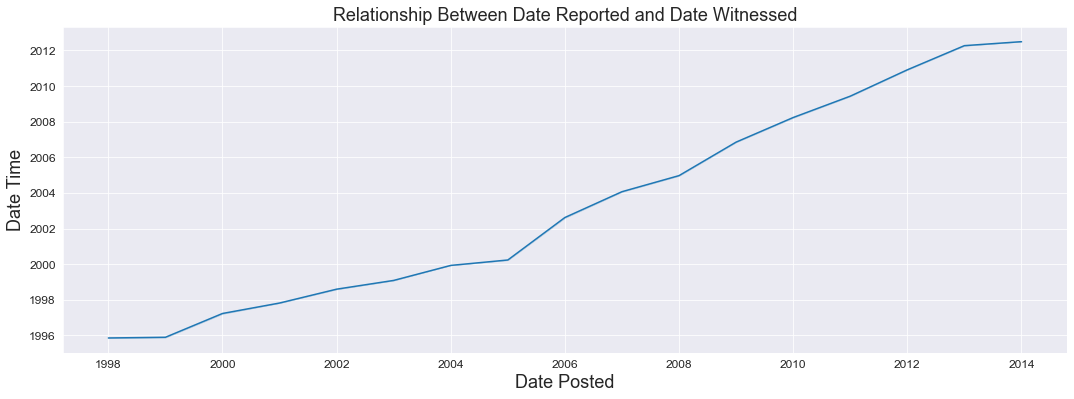

In [22]:
# sns.lineplot(data = ufo_df, x = ufo_df['dateposted'].dt.year, y= ufo_df['datetime'], ci = False)
plt.figure(figsize = (18,6))
sns.set_style("darkgrid")
sns.lineplot(data = ufo_df, x = ufo_df['dateposted'].dt.year,y= ufo_df['datetime'], ci = False);

plt.title('Relationship Between Date Reported and Date Witnessed', fontsize=18)
plt.xlabel('Date Posted', fontsize=18)
plt.ylabel('Date Time', fontsize=18)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);